# Telecom Customer Churn Prediction

**Introduction**

Customer Churn/Attrition is the loss of clients, which is defined as the propensity of a customer to stop doing business with an organization in a given time period.

Telecom industires (Telephone/Internet service providers) often use customer churn analysis and customer churn rate as one of their key business metrics, because the cost of retaining an existing customer is far less than acquring a new one. Therefore, it's important to know churning customers beforehand. 

Predictive analytics use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.

**About the Analysis:**
* This analysis focuses on the behaviour of telecom customers through EDA, and later use predictive analytics to determine the customers who are most likely to churn.



**About the data:**
* Customers who left in last month - the column is called Churn
* Services that each customer has signed up for - phone, multiple lines, internet, online securitiy, online backup, device protection, tech support, and streaming TV and movies
* Customer account information - how long they've been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info - gender, age range, and if they have partners and dependents

- <a href='#1'>1. Data overview</a>
- <a href='#2'>2. Data Manipulation</a>
    - <a href='#2.1'>2.1. Convert Data Types</a>
    - <a href='#2.2'>2.2. Missing Value</a>
- <a href='#3'>3. Exploratory Data Analysis</a>
    - <a href='#3.1'>3.1. Target Variable - Churn Distribution</a>
    - <a href='#3.2'>3.2. Demographic Analysis</a>
        - <a href='#3.2.1'>3.2.1 Gender
        - <a href='#3.2.2'>3.2.2 Senior Citizen
        - <a href='#3.2.3'>3.2.3 Partner and Dependent Status
    - <a href='#3.3'>3.3. Customer Account Information</a>
        - <a href='#3.3.1'>3.3.1 Tenure
        - <a href='#3.3.2'>3.3.2 Contract Type
    - <a href='#3.4'>3.4. Services</a>
    - <a href='#3.5'>3.5. Monthly and Total Charges</a>       
- <a href='#4'>4. Model Building</a>
    - <a href='#4.1'>4.1. Data Preprocessing</a>
         - <a href='#4.1.1'>4.1.1 Converting Categorical Variables to Dummy Variables
         - <a href='#4.1.2'>4.1.2 Scaling All Variables
         - <a href='#4.1.3'>4.1.3 Correlation Analysis
    - <a href='#4.2'>4.2. Baseline Model - Logistic Regression</a>
    - <a href='#4.3'>4.3. Random Forest</a>
    - <a href='#4.4'>4.4. XGBoost</a>

In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing

import seaborn as sns # visualization
sns.set(style = 'white')
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt #visualization

import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization


from sklearn.model_selection import train_test_split #splitting training and testing set
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.ensemble import RandomForestClassifier #Random Forest
from xgboost import XGBClassifier #XGBoost

from sklearn.metrics import accuracy_score, classification_report #Performance Measure
from sklearn.metrics import roc_auc_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

# 1. Data Overview

In [2]:
#Read csv and display first few rows
telecom = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#Data overview
print ("Rows     : " ,telecom.shape[0])
print ("Columns  : " ,telecom.shape[1])
print ("\nFeatures : \n" ,telecom.columns.tolist())
print ("\nData types : \n" ,telecom.dtypes)
print ("\nUnique values :  \n",telecom.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Data types : 
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Unique valu

# 2. Data Manipulation

# 2.1 Convert Data Types

We noticed the type of 'Total Charges' is object, we want to convert the type into a numerical data type.

In [4]:
# Converting Total Charges to a numerical data type, using pandas.to_numeric
# if errors='coerce',then invalid parsing will be set as NaN.
telecom.TotalCharges = pd.to_numeric(telecom.TotalCharges,errors='coerce')
print ("\nMissing values :  \n",telecom.isnull().sum())


Missing values :  
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


# 2.2 Missing Value

After looking at the above output, we can say that there are 11 missing values for Total Charges. 

Steps to handle missing values:
1. Calculate the % of missing values.
2. If the % is very small, the easiest way is to delete the records, as there's a minimal impact to the dataset.
3. If the % is small, impute missing values with avg/median or try other imputation methods (eg. KNN).It can only work with numeric data. 
4. If the % is signicant, general imputation method may not work, as it may introduce too much bias into the dataset. The variable is not accurate. Delete/replace the variable.
5. Try different algorithms. Some algorithms can factor in the missing values and learn the best imputation values for the missing data based on the training loss reduction (ie. XGBoost). Some others have the option to just ignore them (ie. LightGBM — use_missing=false)


In our case, we only found 11 missing values, which is around 0.1% out of 7043 rows, let us remove these 11 rows from our dataset

In [5]:
#Removing 11 missing values,
#When inplace = True , the data is modified in place, which means it will return nothing and the dataframe is now updated. 
telecom.dropna(inplace = True)

#double-check if missing value has been removed.
print ("Rows     : " ,telecom.shape[0])

Rows     :  7032


# 3. Exploratory Data Analysis

Let us first start with exploring our data set, to better understand the patterns in the data and potentially form some hypothesis. First we will look at Correlation analysis, and then observe the distribution of individual variables and then slice and dice our data for any interesting trends.

# 3.1 Target Variable - Churn Distribution

We are trying to predict if the client left the company in the previous month. Therefore we have a binary classification problem with a slightly unbalanced target:

* Churn: No - 73.4%
* Churn: Yes - 26.6%

Note: How to handle imbalanced data?

- Oversampling 
- Undersampling 
- Try different algorithms by adjusting the weights (Hyperparameters tuning)

Text(0.5, 1.0, 'Churn Distribution')

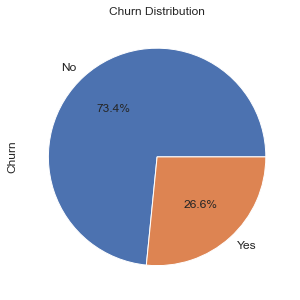

In [6]:
ax = (telecom['Churn'].value_counts()*100.0 /len(telecom))\
.plot.pie(autopct='%.1f%%',figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('Churn Distribution', fontsize = 12)

In [7]:
#Separating churn and non churn customers for analysis
churn     = telecom[telecom["Churn"] == "Yes"]
not_churn = telecom[telecom["Churn"] == "No"]

In [8]:
#Write a function to configure pie chart

def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                        ),
                    hole    = .6
                   )
    
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn Customers" 
                   )
    
    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Churn",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = .5),
                                           dict(text = "Non churn",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .80,y = .5
                                            )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)

# 3.2 Demographic Analysis

Let's first understand the gender, age range, partnerand dependent status of the customers

## 3.2.1 Gender

- About half of the customers in our data set are male while the other half are female
- Gender is not an indicative of churn.

In [9]:
plot_pie("gender")

## 3.2.2 Senior Citizen

 - There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.
 - Senior Citizen has a higher churn rate:  25.5% Churn customers are Senior Citizen, as compared to 12.9% of Non-churn customers are Senior Citizen

Text(0.5, 1.0, '% of Senior Citizens')

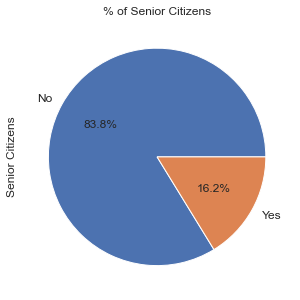

In [10]:
ax = (telecom['SeniorCitizen'].value_counts()*100.0 /len(telecom))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

In [11]:
plot_pie("SeniorCitizen")

## 3.2.3 Partner and Dependent Status

 - About half of the customers have a partner, while only 30% of the total customers have dependents. 
 - Customers without partners are more likely to churn.
 - Customers without dependents are more likely to churn.

Text(0.5, 1.0, '% of Partner')

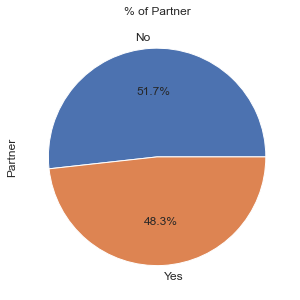

In [12]:
ax = (telecom['Partner'].value_counts()*100.0 /len(telecom))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Partner',fontsize = 12)
ax.set_title('% of Partner', fontsize = 12)

Text(0.5, 1.0, '% of Dependents')

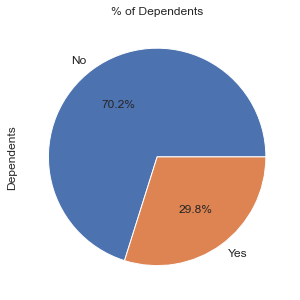

In [13]:
ax= (telecom['Dependents'].value_counts()*100.0 /len(telecom))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )   
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Dependents',fontsize = 12)
ax.set_title('% of Dependents', fontsize = 12)

In [14]:
plot_pie("Partner")
plot_pie("Dependents")

# 3.3 Customer Account Information

# 3.3.1 Tenure

- Recent customers are more likely to churn
- For non-churn customers, they tend to stay longer with the telecom company.

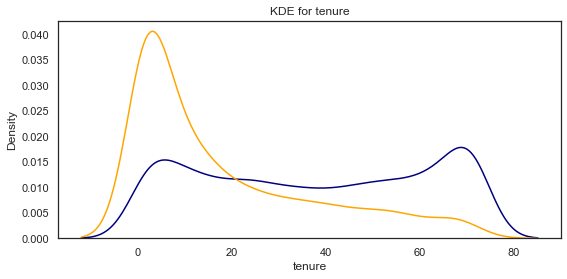

In [15]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(telecom[telecom['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(telecom[telecom['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')

kdeplot('tenure')

# 3.3.2 Contract Type

- 55% Month-to-month, 24% Two-year, 21% One-year
- Among churn customers, 89% are from month-to-month.

Text(0.5, 1.0, '% of Contract')

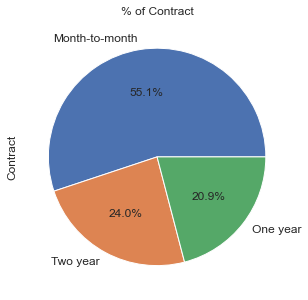

In [16]:
ax = (telecom['Contract'].value_counts()*100.0 /len(telecom))\
.plot.pie(autopct='%.1f%%',figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Contract',fontsize = 12)
ax.set_title('% of Contract', fontsize = 12)

In [17]:
plot_pie("Contract")

# 3.4 Services

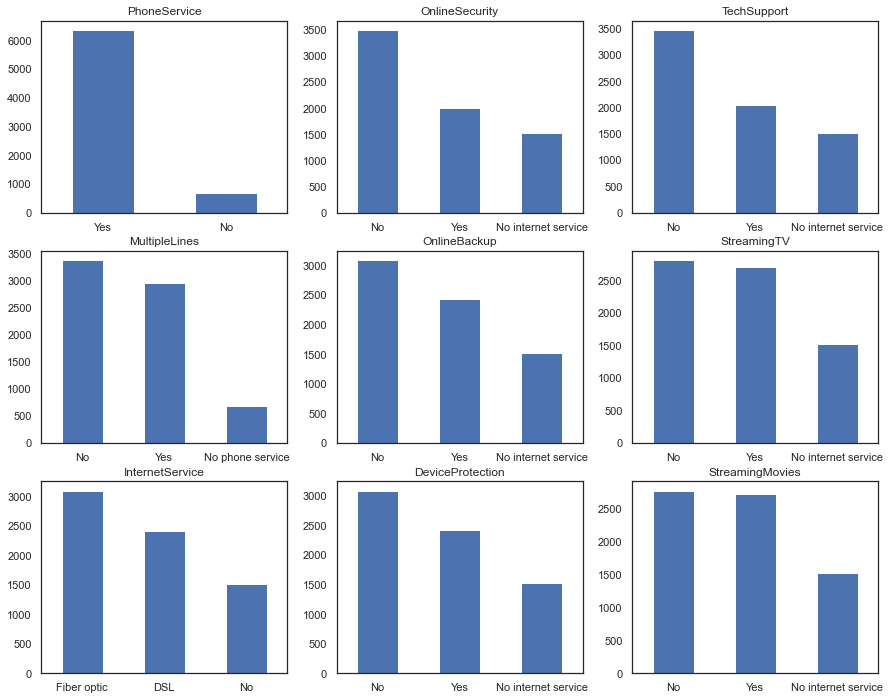

In [18]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telecom[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = telecom[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = telecom[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

# 3.5 Monthly and Total Charges

- We observe that the total charges increases as the monthly bill for a customer increases.
- Higher % of cusotmers churn when the monthly charges are high.
- Higher churn when the total charges are lower.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

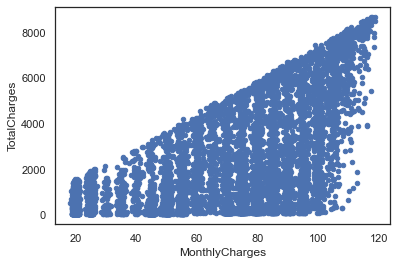

In [19]:
telecom[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

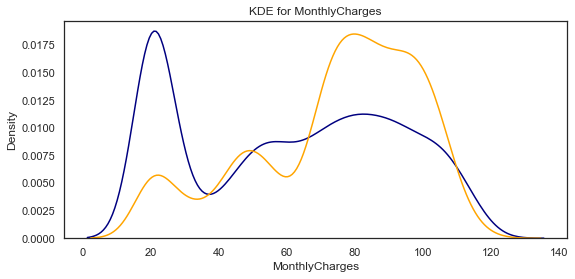

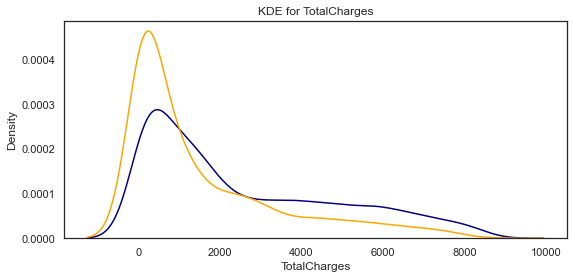

In [20]:
kdeplot("MonthlyCharges")
kdeplot("TotalCharges")

# 4. Model Building

We will develop Logistic Regression, Random Forest, and XG Boost during this workshop

# 4.1 Data Preprocessing

# 4.1.1 Convert Categorical Variables to dummy variables

Many machine learning algorithms can support categorical values without further manipulation but there are many more algorithms that do not. Therefore we need to turn these categorical variables(text attributes) into numerical values for further processing.

A common apporach is called one hot encoding, which is to convert each category value into a new column and assigns a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the dataset.

Pandas supports this feature using get_dummies.

In [21]:
#Convertin the predictor variable in a binary numeric variable
telecom['Churn'].replace(to_replace='Yes', value=1, inplace=True)
telecom['Churn'].replace(to_replace='No',  value=0, inplace=True)

Id_col = ['customerID']
target_col = ['Churn']

#Let's convert all the categorical variables into dummy variables
cat_cols = telecom.nunique()[telecom.nunique()<5].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col + Id_col]
num_cols = [x for x in telecom.columns if x not in cat_cols + target_col + Id_col]
telecom2 = pd.get_dummies(data=telecom, columns = cat_cols)
telecom2.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


# 4.1.2 Scaling all variables

In [28]:
# We will use the data frame where we had created dummy variables
y = telecom2['Churn'].values
X = telecom2.drop(columns = ['customerID','Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

# 4.1.3 Correlation Analysis

<AxesSubplot:>

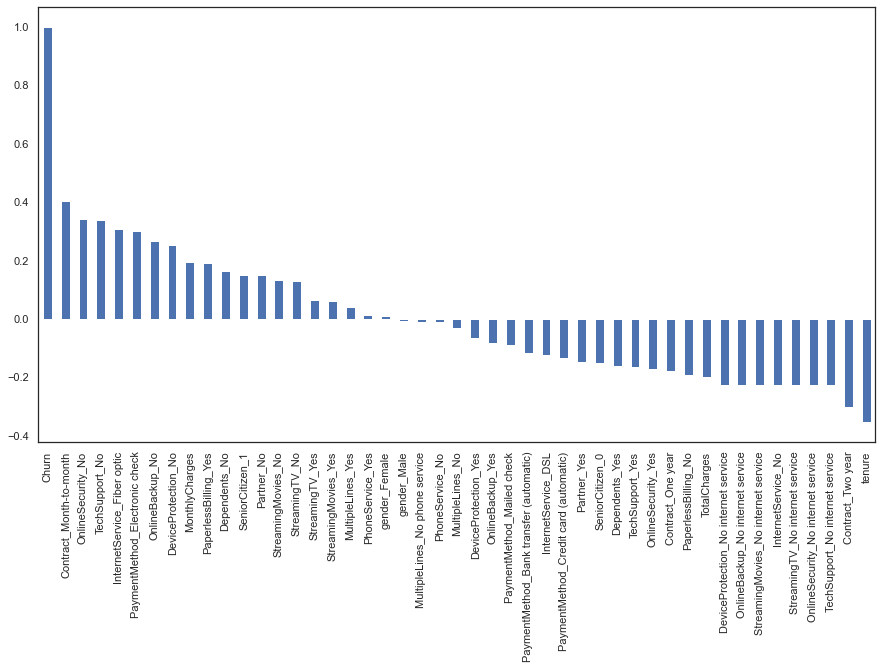

In [23]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
telecom2.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn. 

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

We will explore the patterns for the above correlations below before we delve into modelling and identifying the important variables.

# 4.2 Baseline Model - Logistic Regression

The goal in ML is to build a model that generalizes well to the new data. Therefore the dataset is split into the Training dataset and Testing dataset. 

Testing dataset serves as a proxy for new data to evaluate a trained ML model and determine if the model has over-fitted the data. 

Therefore we split the dataset by using 70% for training, and remaining 30% for testing.

In [24]:
# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Predicting customer churn is a binary classification (Churn vs Non-churn) problem, therefore Logistic Regression will be used to serve as a baseline model.

Logistic Regression is characterized by a logisitic function, also called the sigmoid function, to model a categorical dependent variable based on one or more independent variables. 

Performance Matrics to evaluate ML Models.

- Accuracy Score - ratio of number of correct predictions to the total number of input samples. It works well only if te dataset is balanced (equal number of samples belonging to each class) If the dataset is imbalanced, it may give us a false sense of achieving high accuracy (the model starts to cheat itself)

- Precision: It is the number of correct positive results divided by the number of positive results predicted by the classifier. 
  Precision = TP / (TP+FP) it attempts to answer what proportion of positive identifications was actually correct?
 
- Recall: It is the number of correct positive results divided by the number of all samples that should have been identified as positive
  Recall = TP / (TP + FN) it attempts to answer what proportion of actual positives was identified correctly?
  
- Area Under ROCurve: ROC (Receiver Operating Characteristics) Curve is a plot of the proportion of true positives vs. the proportion of false positives at different probability cutoffs, AUC represents degree of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, better the model is predicting 0s as 0s and 1s as 1s. 

- Feature Importance measures the predicting power of input features based on how useful they are at predicting a target variables. 

In [25]:
# Running logistic regression model
LogReg_Model = LogisticRegression()
LogReg_Result = LogReg_Model.fit(X_train, y_train)
#Prediction
LogReg_Prediction = LogReg_Model.predict(X_test)
LogReg_Probabilities = LogReg_Model.predict_proba(X_test)

print("Logistic Regression")
print("\n Classification Report: \n", classification_report(y_test,LogReg_Prediction))
print("Accuracy Score: ",accuracy_score(y_test,LogReg_Prediction))

#roc AUC
LogReg_AUC = roc_auc_score(y_test, LogReg_Prediction)
print("Area under curve : ", LogReg_AUC, "\n")
fpr,tpr,threasholds = roc_curve(y_test,LogReg_Probabilities[:,1])

#Feature Importance
Coef = pd.Series(LogReg_Model.coef_[0],
                 index=X.columns.values)

print("Feature Importance by Coefficients : \n",Coef.sort_values(ascending = True))

Logistic Regression

 Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.64      0.54      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110

Accuracy Score:  0.8075829383886256
Area under curve :  0.718545497969907 

Feature Importance by Coefficients : 
 tenure                                    -2.890896
Contract_Two year                         -0.728560
InternetService_DSL                       -0.422270
MonthlyCharges                            -0.228713
MultipleLines_No                          -0.159613
SeniorCitizen_0                           -0.136533
PaperlessBilling_No                       -0.135078
TechSupport_Yes                           -0.132043
OnlineSecurity_Yes                        -0.128998
PaymentMethod_Credit card (automatic)     -

**Observations**

We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive relation. Negative relation means that likeliness of churn decreases with that variable. Let us summarize some of the interesting features below:
* As we saw in our EDA, having a 2-year contract reduces chances of churn. 2-year contract along with tenure have the most negative relation with Churn as predicted by logistic regressions
* Total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates.

# 4.3 Random Forest

Random forests are an ensemble learning method for classifiction. Random Forests grows many classification decision trees. To classify a new object from an input vector, put the input vector down each of the trees in the forest. Each tree gives a classification, and we say the tree "votes" for that class. The forest chooses the classification having the most votes.

In [26]:
RF_Model = RandomForestClassifier(n_estimators=500)
RF_Model.fit(X_train, y_train)

RF_Result = RF_Model.fit(X_train, y_train)
RF_Prediction = RF_Model.predict(X_test)
RF_Probabilities = RF_Model.predict_proba(X_test)

print("Random Forest")
print("\n Classification Report: \n", classification_report(y_test,RF_Prediction))
print("Accuracy Score: ",accuracy_score(y_test,RF_Prediction))

#roc AUC
RF_AUC = roc_auc_score(y_test, RF_Prediction)
print("Area under curve : ", RF_AUC, "\n")
fpr,tpr,threasholds = roc_curve(y_test,RF_Probabilities[:,1])

#Feature Importance
feature_importance=RF_Model.feature_importances_
Coef = pd.Series(feature_importance,
                 index=X.columns.values)

print("Feature Importance : \n",Coef.sort_values(ascending = False))

Random Forest

 Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1580
           1       0.62      0.51      0.56       530

    accuracy                           0.80      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.79      0.80      0.79      2110

Accuracy Score:  0.7971563981042654
Area under curve :  0.7002985431096249 

Feature Importance : 
 TotalCharges                               0.154887
tenure                                     0.138453
MonthlyCharges                             0.131521
Contract_Month-to-month                    0.057680
OnlineSecurity_No                          0.031804
TechSupport_No                             0.029543
PaymentMethod_Electronic check             0.027234
InternetService_Fiber optic                0.024906
OnlineBackup_No                            0.018165
gender_Female                              0.017930
gender_Male 

**Observations:**

* From random forest algorithm, total charges, tenure and monthly contract, monthly charges, monthly contracts are the most important predictor variables to predict churn.
* The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA

# 4.4 XGBoost

XGBoost is an implementation of gradient boosting decision trees designed for speed and perormance. It is effective for a wide range of regression and classification problems.


Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models, Models are added sequentially until no further improvements can be ade. And then added together to make the final prediction. It is calld gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models. 

XGBoost works well with imbalanced dataset as it offers a way to tune the training algorithm to pay more attention to misclassification of the minority class for datasets with a skewed class distribution. 

Hyperparamter Tuning: scale_pos_weight (positive class refers to the minority class Y=1), by default it will be set to 1



In [27]:
XGBoost_Model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
                    max_depth = 3, min_child_weight=1, missing=None, n_estimators=100,
                    n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
                    reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                    subsample=1)

XGBoost_Model.fit(X_train, y_train)

XGBoost_Result = XGBoost_Model.fit(X_train, y_train)
XGBoost_Prediction = XGBoost_Model.predict(X_test)
XGBoost_Probabilities = XGBoost_Model.predict_proba(X_test)

print("XGBoost")
print("\n Classification Report: \n", classification_report(y_test,XGBoost_Prediction))
print("Accuracy Score: ",accuracy_score(y_test,XGBoost_Prediction))

#roc AUC
XGBoost_AUC = roc_auc_score(y_test, XGBoost_Prediction)
print("Area under curve : ", XGBoost_AUC, "\n")
fpr,tpr,threasholds = roc_curve(y_test,XGBoost_Probabilities[:,1])

#Feature Importance
feature_importance=XGBoost_Model.feature_importances_
Coef = pd.Series(feature_importance,
                 index=X.columns.values)

print("Feature Importance : \n",Coef.sort_values(ascending = False))

XGBoost

 Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1580
           1       0.67      0.52      0.59       530

    accuracy                           0.82      2110
   macro avg       0.76      0.72      0.73      2110
weighted avg       0.81      0.82      0.81      2110

Accuracy Score:  0.8156398104265403
Area under curve :  0.7182827800334368 

Feature Importance : 
 Contract_Month-to-month                    0.451684
InternetService_Fiber optic                0.103339
TechSupport_No                             0.084305
OnlineSecurity_No                          0.039944
tenure                                     0.038743
PaymentMethod_Electronic check             0.031773
Contract_Two year                          0.031638
PaperlessBilling_No                        0.024368
StreamingMovies_Yes                        0.021171
SeniorCitizen_0                            0.021149
TotalCharges      